## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [2]:
## Let’s generate sample data for 2000 entries of Salary vs. Spending.
np.random.seed(42)

# Generating salary data
salary = np.random.normal(loc=50000, scale=15000, size=1600)
salary = np.append(salary, np.random.normal(loc=100000, scale=25000, size=400))

# Generating spending data
spending = salary * np.random.normal(loc=0.3, scale=0.1, size=2000) + np.random.normal(loc=2000, scale=1000, size=2000)

# Combining into a DataFrame
data = pd.DataFrame({'Salary': salary, 'Spending': spending})


## Exploratory Data Analysis (EDA)

In [4]:
## Checking the First Few Rows of Data
data.head()


,Salary,Spending
0,57450.712295,14492.772801
1,47926.035482,15653.986462
2,59715.328072,15200.653738
3,72845.447846,22082.905145
4,46487.699379,5776.472513


In [5]:
## Summary Stats
data.describe()


,Salary,Spending
count,2000.000000,2000.000000
mean,60808.805469,20081.749295
std,26684.381222,10255.185350
min,1380.989899,700.509899
25%,42797.340591,13030.378173
50%,54897.952970,18045.879310
75%,71869.292841,24722.171601
max,179827.689196,75631.017951


## Visualizing the Data Distribution

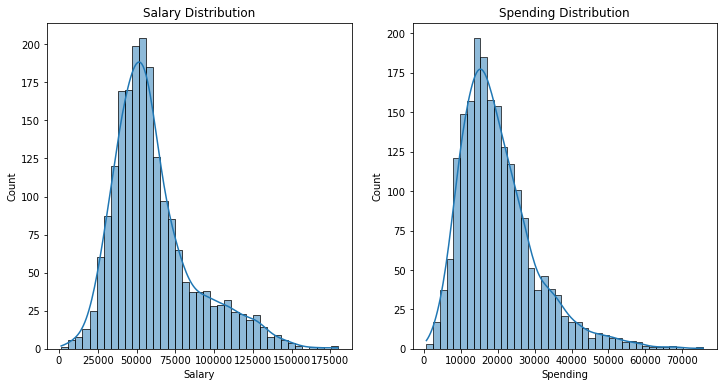

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Salary'], kde=True)
plt.title('Salary Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['Spending'], kde=True)
plt.title('Spending Distribution')

plt.show()


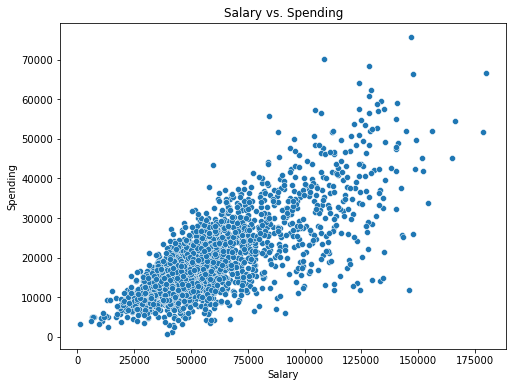

In [8]:
### Scatter Plot of Salary vs. Spending
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Salary', y='Spending', data=data)
plt.title('Salary vs. Spending')
plt.show()


In [9]:
##Data Preprocessing
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


## 5. Determining the Optimal Number of Clusters
- 1. Elbow Method
The Elbow Method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and finding the "elbow" point.

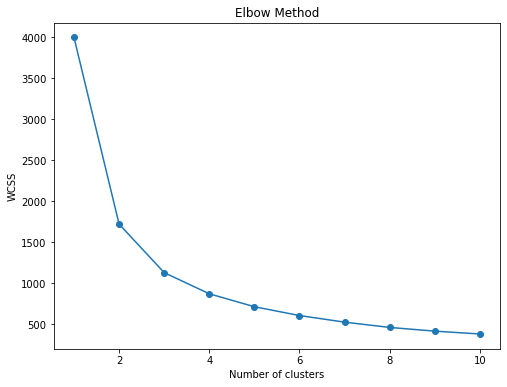

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## 5.2. Silhouette Score
The Silhouette Score helps in evaluating the quality of clusters.

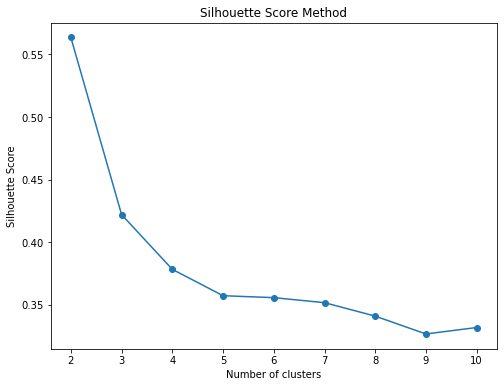

In [11]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


## 6. Applying K-Means Clustering
Applying K-Means Clustering for Different Values of K (3 to 5), Assign group names to the final clusters

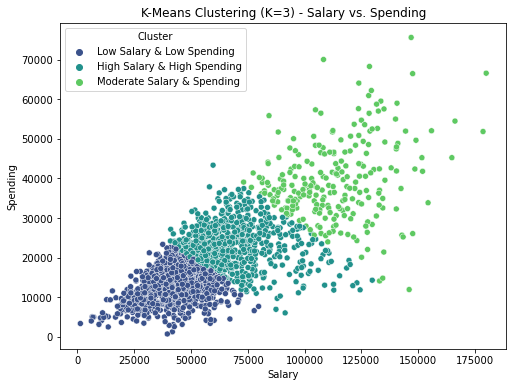

Cluster Centers for K=3:
           Salary      Spending
0   42618.419044  13005.830934
1   67892.949258  23165.301573
2  112937.535052  39353.133326

Cluster Names and Counts:
 Low Salary & Low Spending      999
High Salary & High Spending    755
Moderate Salary & Spending     246
Name: Cluster_Name_3, dtype: int64


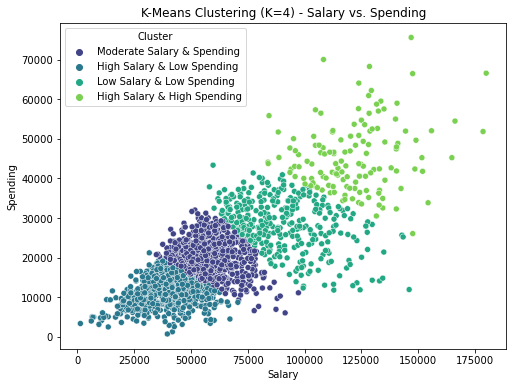

Cluster Centers for K=4:
           Salary      Spending
0   89972.438334  28436.530584
1   39457.686287  11663.848873
2  121507.520963  45562.018502
3   58299.714661  20189.044601

Cluster Names and Counts:
 Moderate Salary & Spending     786
High Salary & Low Spending     743
Low Salary & Low Spending      338
High Salary & High Spending    133
Name: Cluster_Name_4, dtype: int64


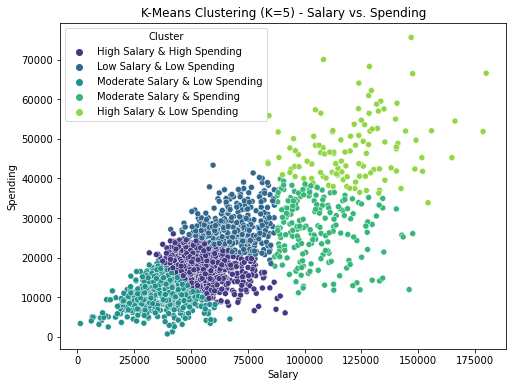

Cluster Centers for K=5:
           Salary      Spending
0   68342.448552  27616.266665
1   36879.367509  10968.270339
2  121353.660180  47423.991662
3   55480.185477  17639.828113
4  105460.894597  27397.426600

Cluster Names and Counts:
 High Salary & High Spending       734
Moderate Salary & Low Spending    596
Low Salary & Low Spending         362
Moderate Salary & Spending        194
High Salary & Low Spending        114
Name: Cluster_Name_5, dtype: int64


In [16]:
k_values = [3, 4, 5]

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)

    # Assigning cluster labels
    data[f'Cluster_{k}'] = clusters

    # Analyzing cluster centers
    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    cluster_centers = pd.DataFrame(centers, columns=['Salary', 'Spending'])

    # Naming clusters (this is a simple naming approach; you may adjust based on actual data)
    if k == 3:
        cluster_names = ['Low Salary & Low Spending', 'High Salary & High Spending', 'Moderate Salary & Spending']
    elif k == 4:
        cluster_names = ['Low Salary & Low Spending', 'High Salary & Low Spending', 'High Salary & High Spending', 'Moderate Salary & Spending']
    elif k == 5:
        cluster_names = ['Low Salary & Low Spending', 'Moderate Salary & Low Spending', 'High Salary & Low Spending', 'High Salary & High Spending', 'Moderate Salary & Spending']

    # Mapping the cluster names
    data[f'Cluster_Name_{k}'] = data[f'Cluster_{k}'].map(dict(zip(range(k), cluster_names)))

    # Plotting the clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Salary', y='Spending', hue=f'Cluster_Name_{k}', data=data, palette='viridis')
    plt.title(f'K-Means Clustering (K={k}) - Salary vs. Spending')
    plt.legend(title='Cluster')
    plt.show()

    print(f"Cluster Centers for K={k}:\n", cluster_centers)
    print("\nCluster Names and Counts:\n", data[f'Cluster_Name_{k}'].value_counts())




### Based on the Elbow and Silhouette methods 3 clusters provide the best fit

In [17]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Assigning cluster labels
data['Cluster_3'] = clusters

# Analyzing cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers = pd.DataFrame(centers, columns=['Salary', 'Spending'])

# Naming clusters
cluster_names = ['Low Salary & Low Spending', 'High Salary & High Spending', 'Moderate Salary & Spending']

# Mapping the cluster names
data['Cluster_Name_3'] = data['Cluster_3'].map(dict(zip(range(3), cluster_names)))


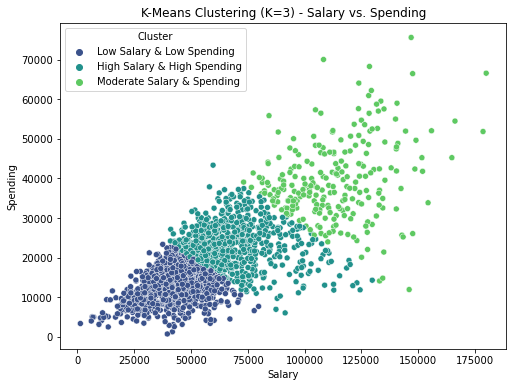

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Salary', y='Spending', hue='Cluster_Name_3', data=data, palette='viridis')
plt.title('K-Means Clustering (K=3) - Salary vs. Spending')
plt.legend(title='Cluster')
plt.show()



In [24]:
 cluster_centers

,Salary,Spending
0,42618.419044,13005.830934
1,67892.949258,23165.301573
2,112937.535052,39353.133326


In [21]:
data['Cluster_Name_3'].value_counts()

Low Salary & Low Spending      999
High Salary & High Spending    755
Moderate Salary & Spending     246
Name: Cluster_Name_3, dtype: int64

### Conclusion
### Low Salary & Low Spending:
- Individuals in this cluster have relatively low salaries and spend less.
- This group might represent entry-level employees or individuals in lower-income brackets.
#### Insight: Focus on budget-friendly products or services and potential financial advice for this group.

### High Salary & High Spending:
- Individuals in this cluster have high salaries and spend more.
- This group could represent high-income professionals or individuals with significant disposable income.
#### Insight: Target premium products, luxury services, or investment opportunities for this group.
### Moderate Salary & Spending:
- Individuals in this cluster have moderate salaries and spending patterns.
- This group may include mid-level professionals or individuals with moderate financial flexibility.
#### Insight: Offer value-for-money products, services, and moderate investment options.